In [2]:
# Import libraries for data manipulation and visualization.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Retrieve data from csv and review data information to get aquainted with it
data = pd.read_csv('../data/complaints-2020-09-14_15_39.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59155 entries, 0 to 59154
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date received                 59155 non-null  object
 1   Product                       59155 non-null  object
 2   Sub-product                   59155 non-null  object
 3   Issue                         59155 non-null  object
 4   Sub-issue                     59155 non-null  object
 5   Consumer complaint narrative  26854 non-null  object
 6   Company public response       59155 non-null  object
 7   Company                       59155 non-null  object
 8   State                         59155 non-null  object
 9   ZIP code                      59155 non-null  object
 10  Tags                          59155 non-null  object
 11  Consumer consent provided?    43030 non-null  object
 12  Submitted via                 59155 non-null  object
 13  Date sent to com

In [4]:
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,05/19/20,Student loan,Private student loan,Dealing with your lender or servicer,Received bad information about your loan,When I was applying for my loan my XXXX accoun...,None,"Figure Technologies, Inc",NJ,None,None,Consent provided,Web,05/19/20,Closed with explanation,Yes,NaN,3660074
1,01/11/20,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Trouble with how payments are being handled,NaN,None,AES/PHEAA,MN,553XX,None,Consent not provided,Web,01/11/20,Closed with monetary relief,Yes,NaN,3492778
2,02/06/20,Student loan,Federal student loan servicing,Incorrect information on your report,Account status incorrect,I'm on a deferred payment plan t never ; late,None,"Nelnet, Inc.",TX,770XX,None,Consent provided,Web,02/10/20,Closed with explanation,Yes,NaN,3522975
3,02/08/20,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Problem with customer service,I have attempted multiple times to contact FED...,None,AES/PHEAA,KY,407XX,None,Consent provided,Web,02/08/20,Closed with non-monetary relief,Yes,NaN,3524942
4,01/21/20,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Trouble with how payments are being handled,I was divorced in 2004 and I agreed to take th...,None,AES/PHEAA,OK,731XX,None,Consent provided,Web,01/21/20,Closed with explanation,Yes,NaN,3503232


In [5]:
data.describe()

,Complaint ID
count,5.915500e+04
mean,2.229264e+06
std,9.493948e+05
min,8.200000e+01
25%,1.746459e+06
50%,2.363585e+06
75%,2.942010e+06
max,3.836492e+06


In [6]:
data['Consumer disputed?'].value_counts()

No     26601
Yes     5936
Name: Consumer disputed?, dtype: int64

The only numerical column is [Consumer disputed?], but doesn't have any values. Usually we would try to fix this issue, but since I don't own the data I can't fix it or retrieve the proper information.

In [7]:
data['Product'].value_counts()

Student loan    59155
Name: Product, dtype: int64

[Product] only has one value because I've already filtered this data down to only student loan data.

In [8]:
data['Date received'].max()

'12/31/19'

In [9]:
data['Date received'].sort_values(ascending=False)

7560     12/31/19
1337     12/31/19
16907    12/31/19
1213     12/31/19
28463    12/31/19
           ...   
20534    01/01/13
37106    01/01/13
52624    01/01/13
58166    01/01/13
49867    01/01/13
Name: Date received, Length: 59155, dtype: object

In [10]:
data['Date received'].min()

'01/01/13'

It looks like the data spans from January 01, 2013 through December 31, 2019 (8 years of data). There hasn't been an update at all during 2020 so my guess would be the dataset gets updated yearly.

In [11]:
data['Date received'] = pd.to_datetime(data['Date received'])
data['month'] = data['Date received'].dt.month
data['year'] = data['Date received'].dt.year

In [12]:
data['year']

0        2020
1        2020
2        2020
3        2020
4        2020
         ... 
59150    2019
59151    2017
59152    2017
59153    2017
59154    2017
Name: year, Length: 59155, dtype: int64

In [18]:
data['year'].min()

2012

Interesting enough when I pull the year I can see that 2012 is actually the lowest value. Lets take a look deeper into this. 

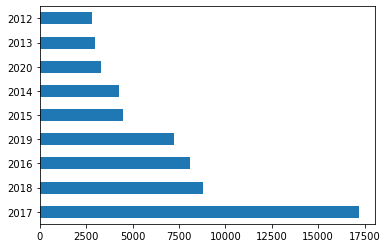

In [14]:
data['year'].value_counts().plot(kind='barh')

In [19]:
data['year'].max()

2020

In [20]:
data['Date received'].max()

Timestamp('2020-09-08 00:00:00')

In [21]:
data.loc[data['Date received'] == data['Date received'].max()]

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,month,year
9623,2020-09-08,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Trouble with how payments are being handled,NaN,None,"Navient Solutions, LLC.",FL,34609,Older American,None,Web,09/08/20,Closed with explanation,Yes,NaN,3836492,9,2020


The logic might've been off when I checked out the min and max data, as we can see here there actaully is data from 2020, so I'm going to pull and look at all the information for 2020, then I will do for the minimum year as well, which I think is 2012 (but we will find out).

In [39]:
def dataframeSize(dataframe):
    return dataframe.shape[0]

data_2020 = data.loc[data['year'] == 2020]
print("Count of 2020 instances:", dataframeSize(data_2020))

# Here I'm just making sure there aren't any complaints from 2011.
data_2011 = data.loc[data['year'] == 2011]
print("Count of 2011 instances:", dataframeSize(data_2011))

data_2012 = data.loc[data['year'] == 2012]
print("Count of 2012 instances:", dataframeSize(data_2012))

Count of 2020 instances: 3278
Count of 2011 instances: 0
Count of 2012 instances: 2840


Thus we see there aren't any instances in 2011, but there are instances in 2012. 

One thing we learned a few lines of code back was there aren't consumer complaint narratives for ever instance. Since this project will be on working with text analytics that's not something we want. So, we are going to explore that and see what data is missing the complaint narrative (approxamitely 55% of the data is missing the narratives).

In [40]:
c

year,2012,2013,2014,2015,2016,2017,2018,2019,2020
Company,2840,3005,4283,4501,8087,17173,8776,7212,3278
Company public response,2840,3005,4283,4501,8087,17173,8776,7212,3278
Company response to consumer,2840,3005,4283,4501,8087,17173,8776,7212,3278
Complaint ID,2840,3005,4283,4501,8087,17173,8776,7212,3278
Consumer complaint narrative,0,0,0,1805,4179,9642,5291,4282,1655
Consumer consent provided?,0,0,0,3122,6990,15761,7916,6366,2875
Consumer disputed?,2840,3005,4283,4501,8087,9821,0,0,0
Date received,2840,3005,4283,4501,8087,17173,8776,7212,3278
Date sent to company,2840,3005,4283,4501,8087,17173,8776,7212,3278
Issue,2840,3005,4283,4501,8087,17173,8776,7212,3278


In [65]:
NaN = data.loc[data['year'] == 2012]['Consumer complaint narrative']
text_data = data.loc[data['Consumer complaint narrative'].str.len() > 0]
pivot_by_year_wout_text = pd.pivot_table(text_data, columns='year', aggfunc='count')
pivot_by_year_wout_text

year,2015,2016,2017,2018,2019,2020
Company,1805,4179,9642,5291,4282,1655
Company public response,1805,4179,9642,5291,4282,1655
Company response to consumer,1805,4179,9642,5291,4282,1655
Complaint ID,1805,4179,9642,5291,4282,1655
Consumer complaint narrative,1805,4179,9642,5291,4282,1655
Consumer consent provided?,1805,4179,9642,5291,4282,1655
Consumer disputed?,1805,4179,5165,0,0,0
Date received,1805,4179,9642,5291,4282,1655
Date sent to company,1805,4179,9642,5291,4282,1655
Issue,1805,4179,9642,5291,4282,1655


In [66]:
text_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26854 entries, 0 to 59154
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date received                 26854 non-null  datetime64[ns]
 1   Product                       26854 non-null  object        
 2   Sub-product                   26854 non-null  object        
 3   Issue                         26854 non-null  object        
 4   Sub-issue                     26854 non-null  object        
 5   Consumer complaint narrative  26854 non-null  object        
 6   Company public response       26854 non-null  object        
 7   Company                       26854 non-null  object        
 8   State                         26854 non-null  object        
 9   ZIP code                      26854 non-null  object        
 10  Tags                          26854 non-null  object        
 11  Consumer consent provided?  

Now the dataframe text_data is only the data with consumer complaints narratives, which is what we are looking for in this project. There is a few columns that we don't really need, so we will get rid of these, let's just find out which ones.

In [67]:
text_data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,month,year
0,2020-05-19,Student loan,Private student loan,Dealing with your lender or servicer,Received bad information about your loan,When I was applying for my loan my XXXX accoun...,None,"Figure Technologies, Inc",NJ,None,None,Consent provided,Web,05/19/20,Closed with explanation,Yes,NaN,3660074,5,2020
2,2020-02-06,Student loan,Federal student loan servicing,Incorrect information on your report,Account status incorrect,I'm on a deferred payment plan t never ; late,None,"Nelnet, Inc.",TX,770XX,None,Consent provided,Web,02/10/20,Closed with explanation,Yes,NaN,3522975,2,2020
3,2020-02-08,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Problem with customer service,I have attempted multiple times to contact FED...,None,AES/PHEAA,KY,407XX,None,Consent provided,Web,02/08/20,Closed with non-monetary relief,Yes,NaN,3524942,2,2020
4,2020-01-21,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Trouble with how payments are being handled,I was divorced in 2004 and I agreed to take th...,None,AES/PHEAA,OK,731XX,None,Consent provided,Web,01/21/20,Closed with explanation,Yes,NaN,3503232,1,2020
5,2019-12-04,Student loan,Federal student loan servicing,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,This particular account situation that is late...,None,AES/PHEAA,FL,323XX,None,Consent provided,Web,12/04/19,Closed with explanation,Yes,NaN,3458781,12,2019


In [68]:
text_data['Company public response'].value_counts()

None                                                                                                                       22987
Company believes it acted appropriately as authorized by contract or law                                                    1838
Company has responded to the consumer and the CFPB and chooses not to provide a public response                             1285
Company chooses not to provide a public response                                                                             219
Company believes complaint caused principally by actions of third party outside the control or direction of the company      200
Company believes complaint is the result of an isolated error                                                                134
Company disputes the facts presented in the complaint                                                                         76
Company believes the complaint is the result of a misunderstanding                               

In [69]:
text_data['Tags'].value_counts()

None                             23751
Servicemember                     2304
Older American                     679
Older American, Servicemember      120
Name: Tags, dtype: int64

In [70]:
text_data['Consumer consent provided?'].value_counts()

Consent provided    26854
Name: Consumer consent provided?, dtype: int64

In [71]:
text_data['Submitted via'].value_counts()

Web    26854
Name: Submitted via, dtype: int64

In [80]:
text_data.loc[text_data['Date received'] != 
              text_data['Date sent to company'] \
              .astype('datetime64[ns]')]['Date received'].count()

5080

There is two seperate dates here, one is date received and the other is date sent to company. Not all of the date's are identical but most of them are, so I will get rid of one. We will omit the date sent to company, because reading the documentation stated for this dataset the complaint is first sent to the CFPB (date received) and then the CFPB sends it to the company (date sent to company). The date the complaint was actually made was the date received, so that's the one we want to keep.

In [81]:
text_data['Timely response?'].value_counts()

Yes    26364
No       490
Name: Timely response?, dtype: int64

In [83]:
text_data['Consumer disputed?'].value_counts()

No     9011
Yes    2138
Name: Consumer disputed?, dtype: int64

In [85]:
text_data['Complaint ID'].value_counts()

2951167    1
2862718    1
3383033    1
3114746    1
2395899    1
          ..
2097349    1
2313212    1
2311165    1
2472962    1
2563286    1
Name: Complaint ID, Length: 26854, dtype: int64

In [97]:
unknown_zipcode_count = text_data.loc[text_data['ZIP code'].str.get(4) == 'X']['ZIP code'].count()
known_zipcode_count = text_data['ZIP code'].count()

print("ZIPCODE count:")
print(unknown_zipcode_count, "items have incomplete zipcodes out of", known_zipcode_count)
print("Which is {:.2%}".format(unknown_zipcode_count / known_zipcode_count))

ZIPCODE count:
18256 items have incomplete zipcodes out of 26854
Which is 67.98%


Items to get rid of:

    Product - All of them are the same because it's student loans
    Company public response - Not enough data to really categorize well
    Consumer consent provided - Everyone gave their consent
    Submitted via - everyone sent it in via web
    Date sent to company - as mentioned above we really just care about date received by CFPB
    Complaint ID - unique identifiers of the data (don't need for this analysis)
    ZIP code - 67.98% of people didn't give their consent for the ZIP code, so we will just use state to get 
                demographics.

In [100]:
narrowed_text_data = text_data.drop(['Product', 'Company public response', 'Consumer consent provided?', 
                                    'Submitted via', 'Date sent to company', 'Complaint ID', 'ZIP code'], 
                                    axis=1)

In [101]:
narrowed_text_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26854 entries, 0 to 59154
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date received                 26854 non-null  datetime64[ns]
 1   Sub-product                   26854 non-null  object        
 2   Issue                         26854 non-null  object        
 3   Sub-issue                     26854 non-null  object        
 4   Consumer complaint narrative  26854 non-null  object        
 5   Company                       26854 non-null  object        
 6   State                         26854 non-null  object        
 7   Tags                          26854 non-null  object        
 8   Company response to consumer  26854 non-null  object        
 9   Timely response?              26854 non-null  object        
 10  Consumer disputed?            11149 non-null  object        
 11  month                       

In [102]:
narrowed_text_data.to_csv('../data/text_analysis_data.csv', index=False)